<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#k-Nearest-Neighbor-classification-model" data-toc-modified-id="k-Nearest-Neighbor-classification-model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>k-Nearest Neighbor classification model</a></span></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Problem statement - 2</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#k-Nearest-Neighbour-model" data-toc-modified-id="k-Nearest-Neighbour-model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>k-Nearest Neighbour model</a></span></li></ul></li></ul></div>

### Problem statement - 1

In [1]:
# Loading dataset and EDA
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import confusion_matrix, classification_report

# Warnings
import warnings
warnings.filterwarnings('ignore')

#### Exploratory Data Analysis

In [2]:
glass_df = pd.read_csv(r".\glass.csv")

# Glance of dataset
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#1. Shape of dataset
glass_df.shape

(214, 10)

In [4]:
#2. Technical summary
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#3. Presence of null values
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
#4. Presence of duplicates
glass_df.duplicated().sum()

1

In [7]:
# Removing of duplicate entry
glass_df = glass_df.drop_duplicates()
glass_df.shape

(213, 10)

In [8]:
#5. Statistical summary
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Visualization

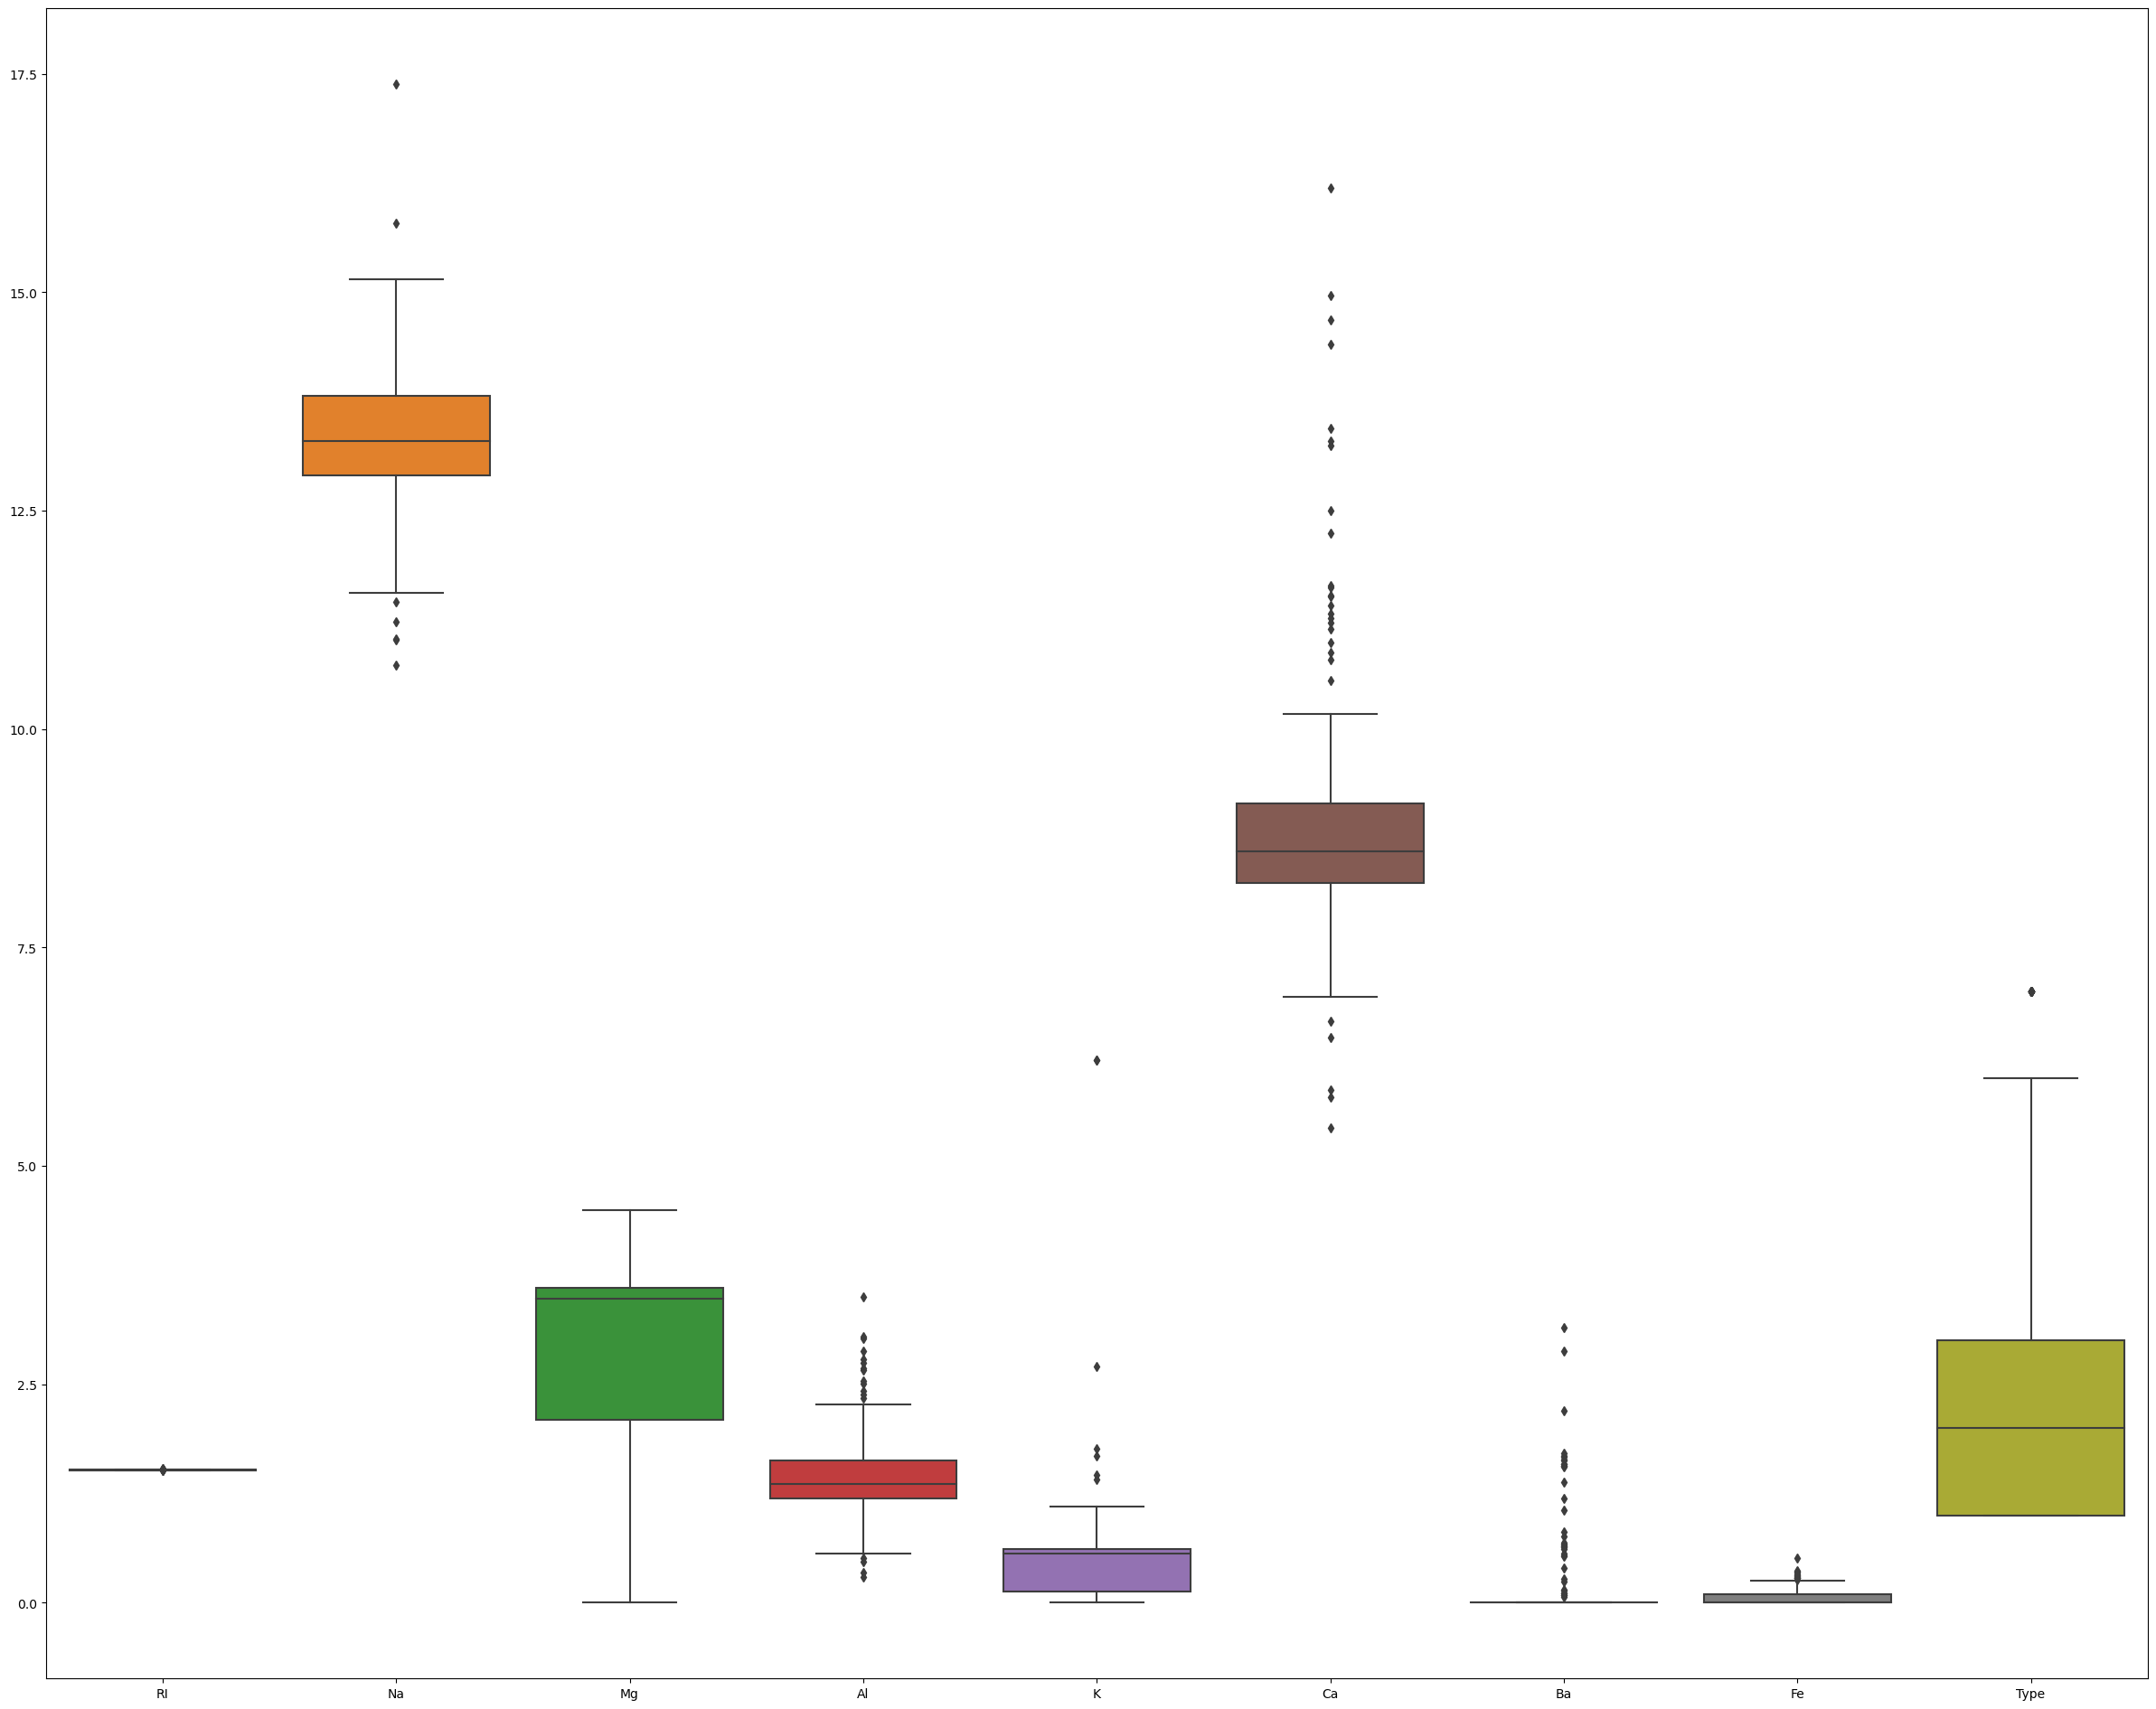

In [9]:
#6. Presence of ouliers
plt.figure(figsize=(30, 24))
sns.boxplot(data=glass_df.drop('Si', axis=1))
plt.show()

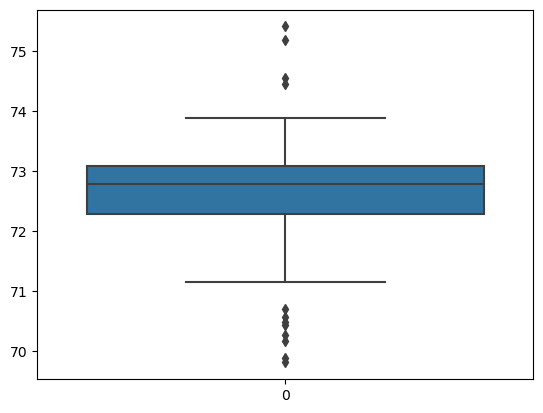

In [10]:
sns.boxplot(data=glass_df['Si'])
plt.show()

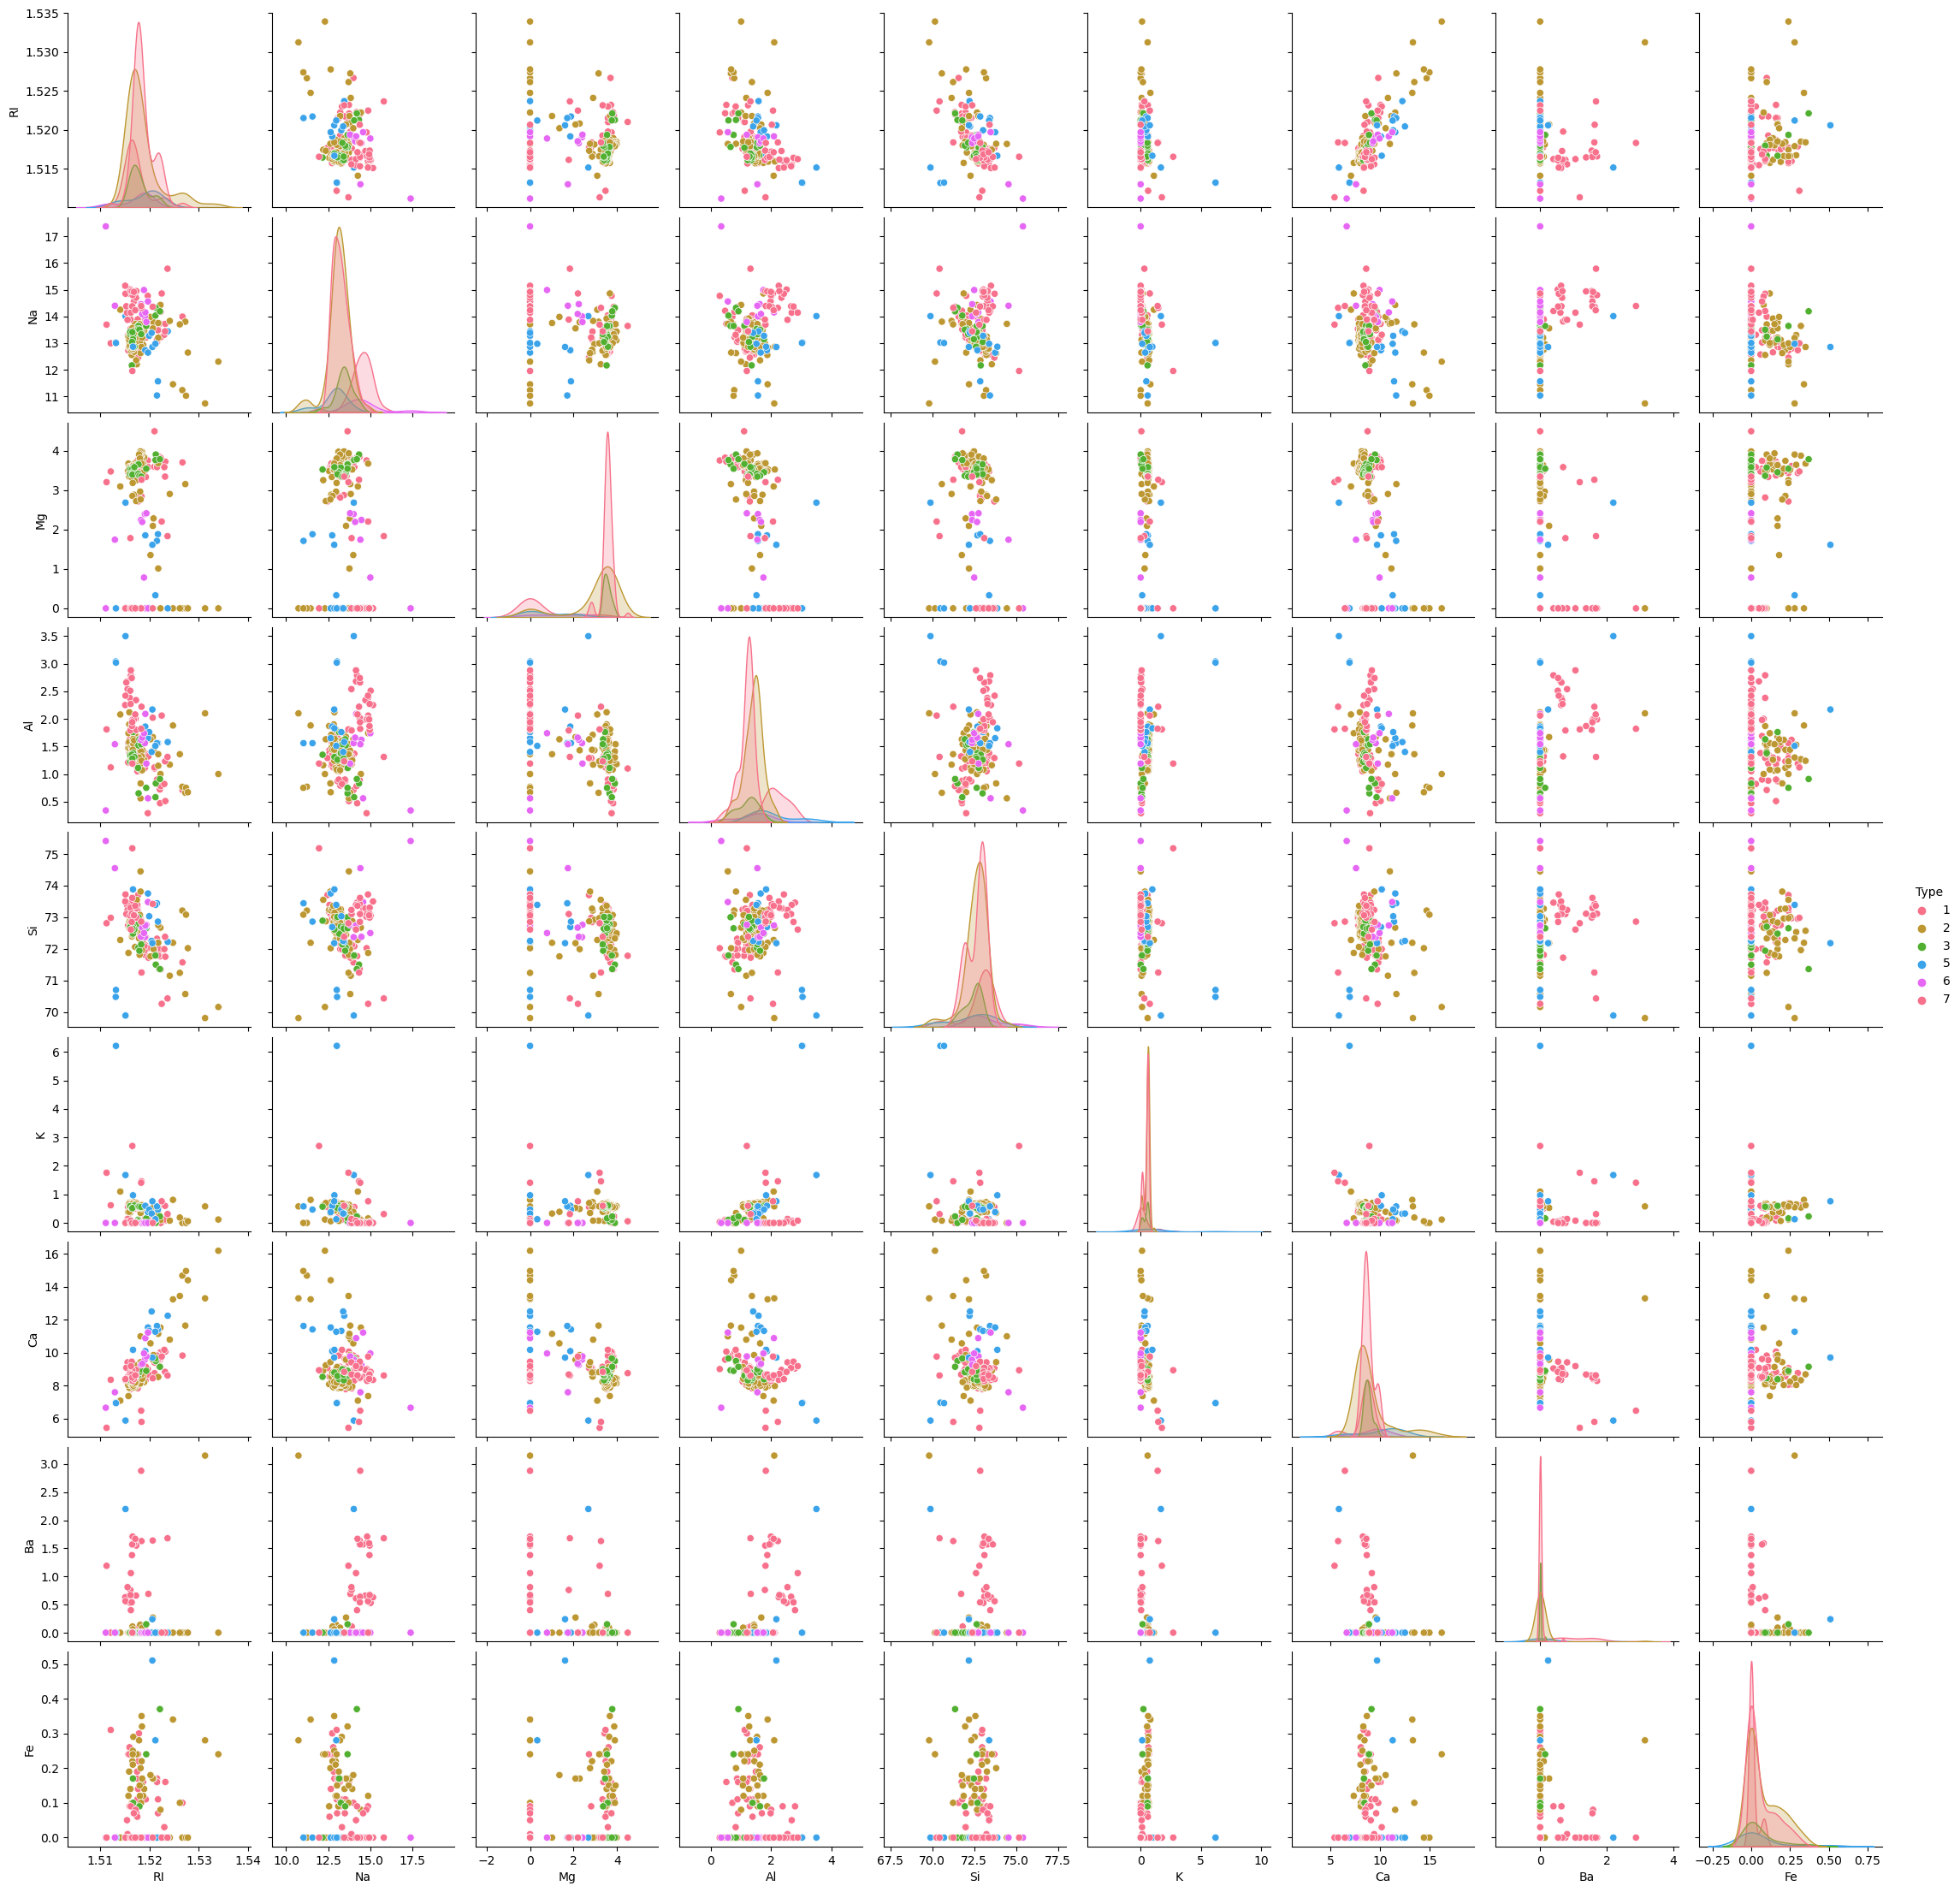

In [11]:
#7. Dataset distribution
sns.pairplot(data=glass_df, kind='scatter', diag_kind='kde', hue='Type', palette='husl')
plt.show()

In [12]:
glass_df.skew()

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

In [13]:
#8. Correlation among columns
glass_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


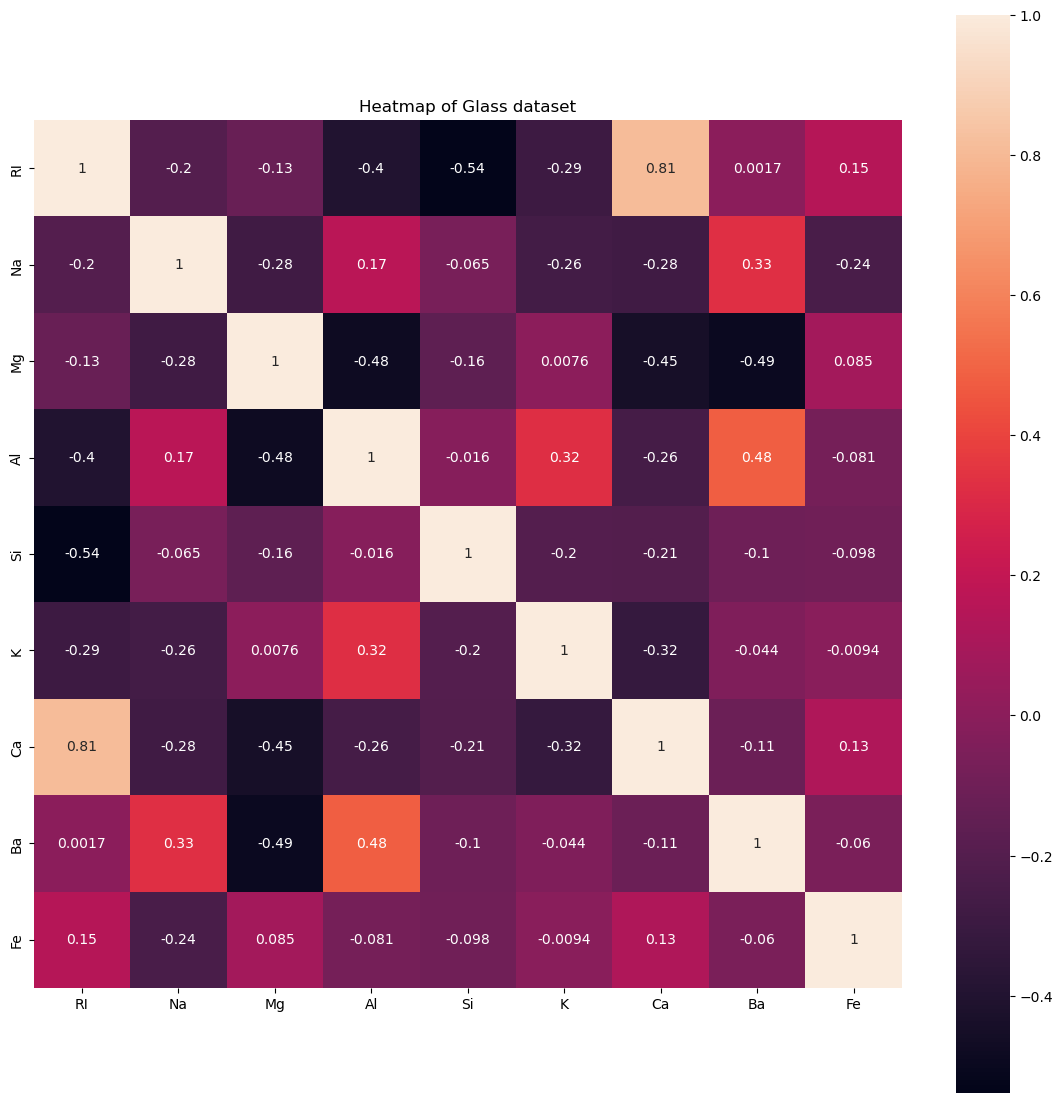

In [14]:
plt.figure(figsize=(14, 14))
sns.heatmap(data=glass_df.drop('Type', axis=1).corr(), annot=True, square=True)
plt.title('Heatmap of Glass dataset')
plt.show()

Observation:
1. Dataset has 214 records and 10 columns.
2. Datatypes are consistent.
3. No null values observed.
4. One duplicate value observed and removed.
5. Outliers can be observed as per boxplot distribution. Needs to standardized before proceeding.
6. Columns Mg and Si are left skewed and remaing columns right skewed.
7. Low correlation among dataset.

#### k-Nearest Neighbor classification model

In [15]:
# Features selection
# Features
x = glass_df.drop('Type', axis=1)

# Target
y = glass_df['Type']

In [16]:
# Splitting dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [17]:
# Scaling of dataset

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train.shape

(170, 9)

In [19]:
x_test.shape

(43, 9)

In [20]:
# Using Hyperparameter tuning finding best kNN claissifier parameters

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
param_grid = {'n_neighbors': list(range(1,13)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute'),
             "metric":['minkowski'], "p":[1, 2]}
gs = GridSearchCV(knn_clf, param_grid, cv=10)
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'p': [1, 2]})

In [21]:
print('Best parameters for kNN classifier: ')
gs.best_params_

Best parameters for kNN classifier: 


{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1}

In [22]:
print('Score of the best model: ')
gs.score(x_test, y_test)

Score of the best model: 


0.6976744186046512

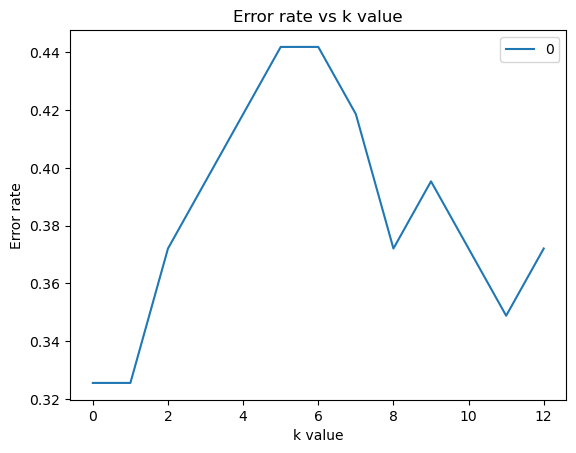

In [23]:
# Cross checking k value
error_value = []
for k in range(1, 14):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    predict_k = model.predict(x_test)
    error_value.append(np.mean(predict_k != y_test))

# Plotting
pd.DataFrame(error_value).plot()
plt.xlabel('k value')
plt.ylabel('Error rate')
plt.title('Error rate vs k value')
plt.show()

In [24]:
# Evaluation

labels = gs.predict(x_test)
print('Confusion matrix: ')
cm = confusion_matrix(y_test, labels)
print(cm)
print()

print('Classification report: ')
clr = classification_report(y_test, labels)
print(clr)

Confusion matrix: 
[[ 9  0  0  0  0  0]
 [ 4 13  1  0  0  0]
 [ 4  1  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  0  0  6]]

Classification report: 
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         9
           2       0.81      0.72      0.76        18
           3       0.50      0.17      0.25         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.70        43
   macro avg       0.64      0.56      0.56        43
weighted avg       0.70      0.70      0.67        43




Types of Glass -
1 -- building_windows_float_processed
2 -- building_windows_non_float_processed
3 -- vehicle_windows_float_processed
4 -- vehicle_windows_non_float_processed (none in this database)
5 -- containers
6 -- tableware
7 -- headlamps



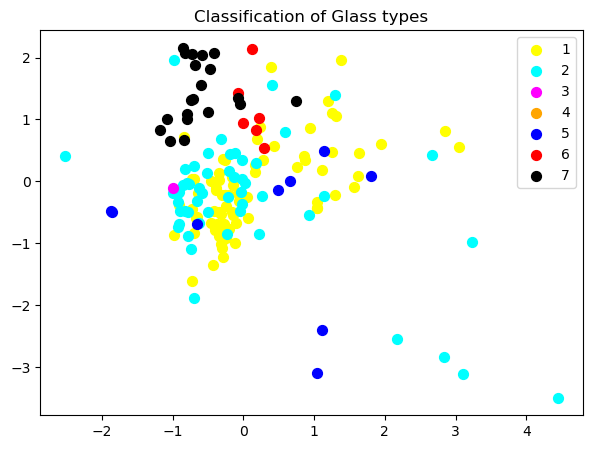

In [25]:
print('''
Types of Glass -
1 -- building_windows_float_processed
2 -- building_windows_non_float_processed
3 -- vehicle_windows_float_processed
4 -- vehicle_windows_non_float_processed (none in this database)
5 -- containers
6 -- tableware
7 -- headlamps
''')

# Visualization of glass classification of train data
x=x_train
y_means = knn_clf.predict(x)
plt.figure(figsize=(7,5))

plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')

plt.title('Classification of Glass types')
plt.legend(labels = [1, 2, 3, 4, 5, 6, 7])
plt.show()

Observation:

From above, it can be observed that kNN classifier with best parameters {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1} have accuracy of 70%.

#### Problem statement - 2

Implement a KNN model to classify the animals in to categorie

#### Exploratory Data Analysis

In [26]:
# Loading dataset

zoo_df = pd.read_csv(r".\Zoo.csv")

# Glance of dataset
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
#1. Shape of dataset
zoo_df.shape

(101, 18)

In [28]:
#2. Technical information
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [29]:
#3. Presence of null values
zoo_df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [30]:
#4. Presence of duplicate records
zoo_df.duplicated().sum()

0

In [31]:
#5. Unique values
zoo_df.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [32]:
#6. Statistical summary
zoo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


#### Visualization

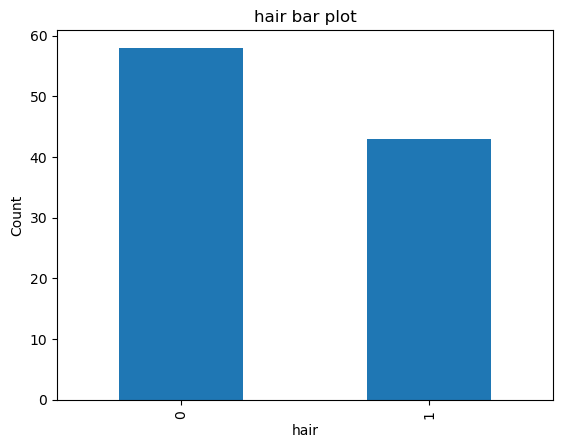

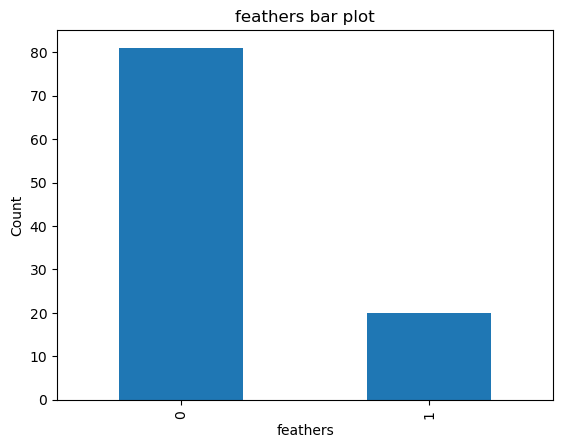

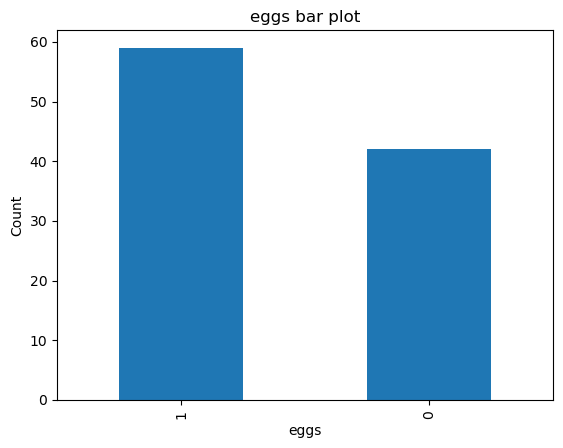

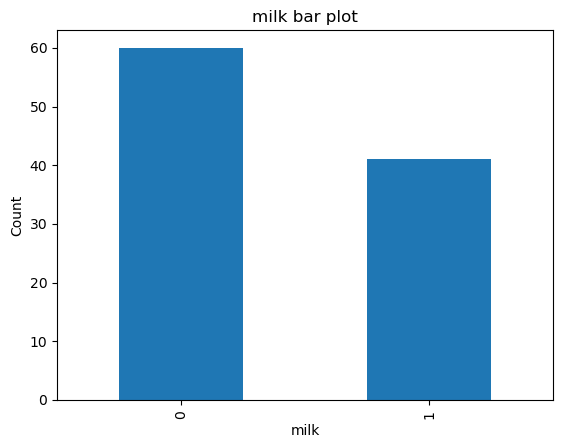

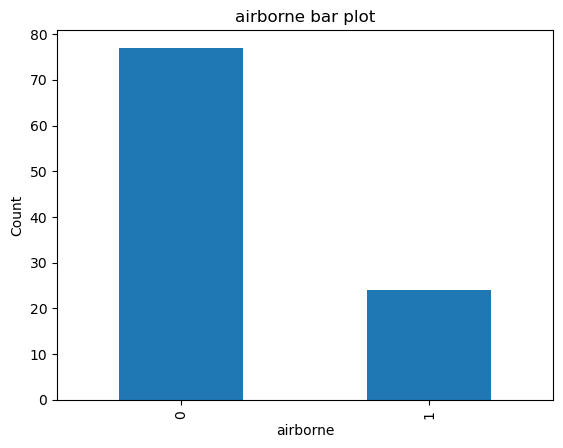

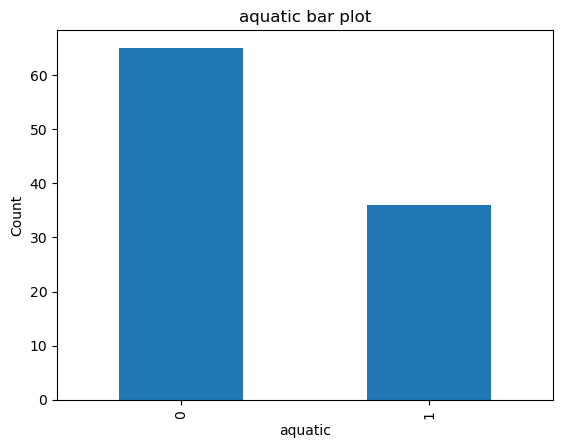

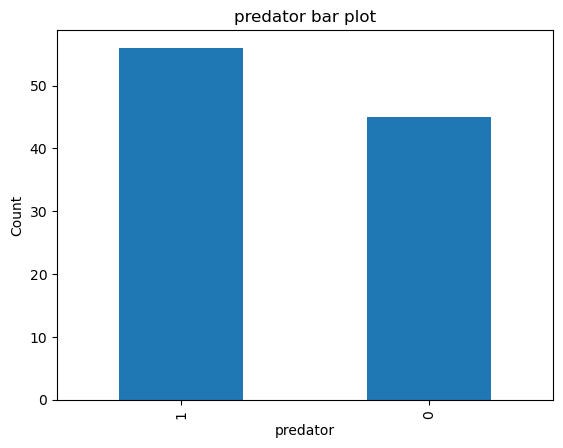

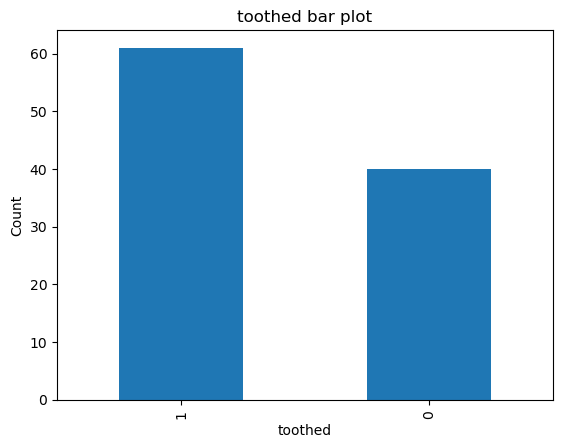

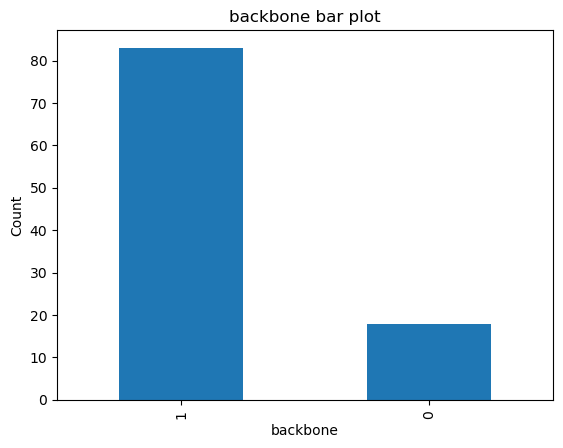

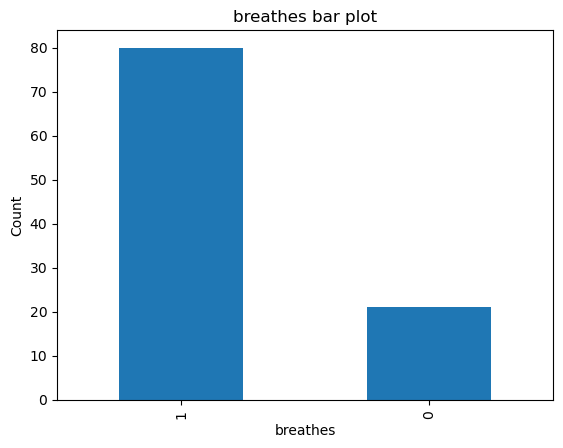

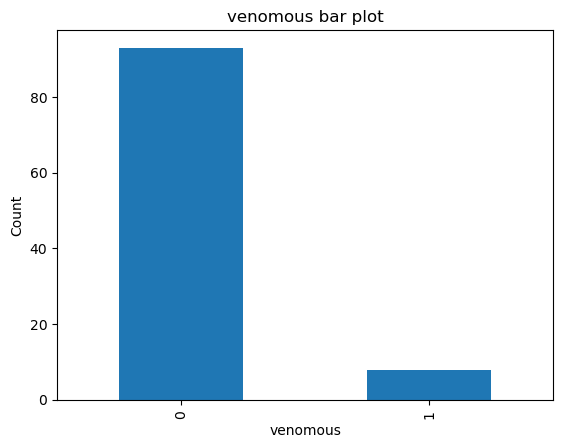

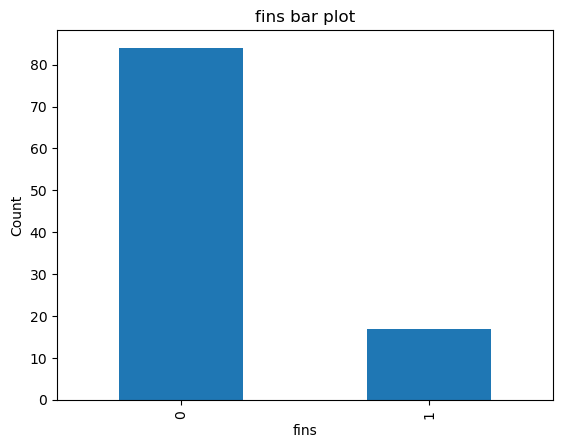

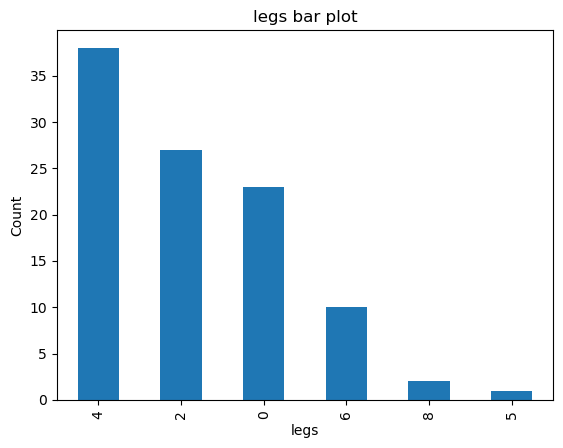

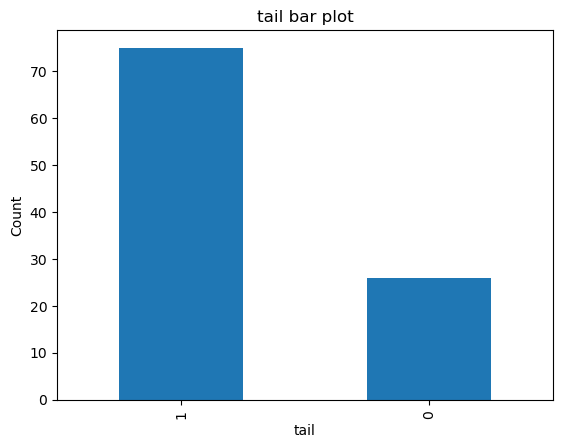

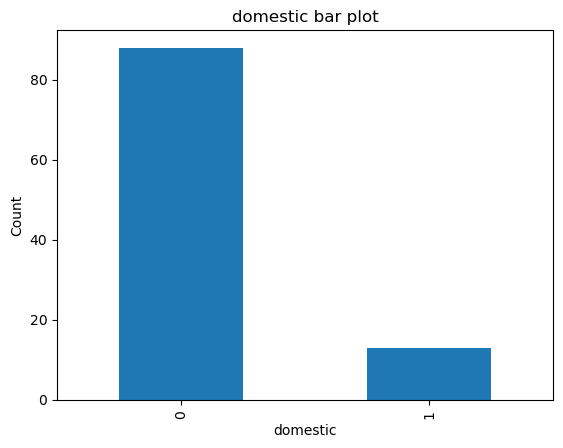

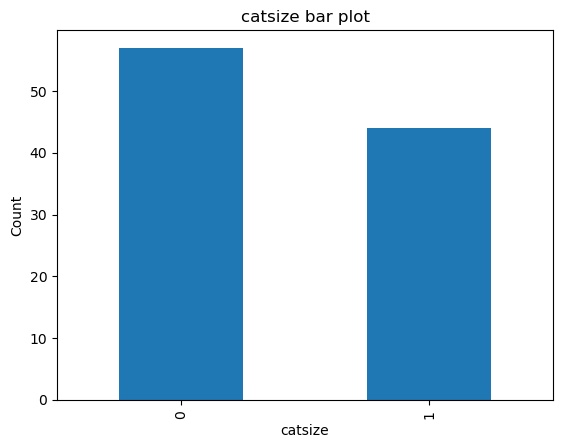

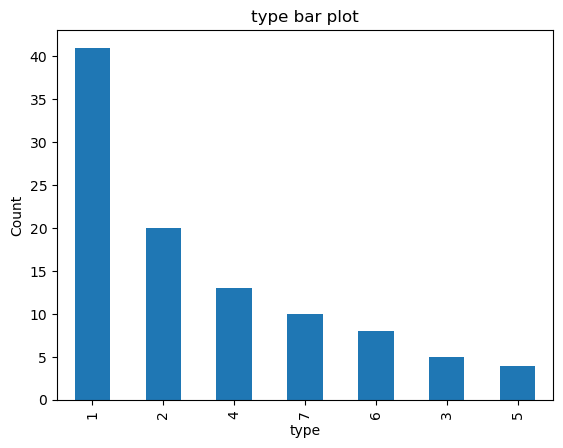

In [33]:
#7. Visualization of dataset
columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne','aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
for column in columns:
    zoo_df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} bar plot')
    plt.show()

Observation:
1. Dataset has 101 animals and 17 characteristics.
2. No null values present.
3. No duplicates records observed.
4. All columns except legs are in boolean form. 
5. There are 7 types of animal category in the given dataset.

In [34]:
# Features selection
# Independent features
# Animal name column is not required for classification
x = zoo_df.drop(['animal name','type'], axis=1)

# Target values
y = zoo_df['type']

#### k-Nearest Neighbour model

In [35]:
# Using Hyperparameter tuning finding best kNN claissifier parameters

knn_clf = KNeighborsClassifier()
knn_clf.fit(x, y)
param_grid = {'n_neighbors': list(range(1,11)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute'),
             "metric":['minkowski'], "p":[1, 2]}
gs = GridSearchCV(knn_clf, param_grid, cv=10)
gs.fit(x, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [36]:
print('Best parameters for kNN classifier model')
gs.best_params_

Best parameters for kNN classifier model


{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 1, 'p': 2}

In [37]:
# Evaluation of model

predicts = gs.predict(x)
print('Confusion matrix for the model: ')
cm = confusion_matrix(y, predicts)
print(cm)
print()
print('Classification report: ')
clr = classification_report(y, predicts)
print(clr)

Confusion matrix for the model: 
[[41  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0 13  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0 10]]

Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00        10

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



In [38]:
# Best model with best parameters
knn_clf = KNeighborsClassifier(algorithm='ball_tree', metric='minkowski', n_neighbors=1, p=2)
knn_clf.fit(x, y)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [39]:
# Predictor function
def category_predictor(data):
    predict = knn_clf.predict(data.drop('animal name', axis=1))
    return predict

In [42]:
# Animal category predictor  
check = input('Type "Yes" to enter Animal details or any letter for default Panda: ').lower()
cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

if check.lower() == 'yes':
    data = {}
    data['animal name'] = input('Enter animal name: ').title()
    for col in cols:
        if col == 'legs':
            data[col] = int(input(f'{col}- Nos of legs: '))
        else:
            data[col] = int(input(f'{col}- 1 for Yes / 0 for No: '))
else:
    data = {
        'animal name': 'Panda', 'hair': 1, 'feathers': 0, 'eggs': 0, 'milk': 1, 'airborne': 0,
        'aquatic': 0, 'predator': 0, 'toothed': 1, 'backbone': 1, 'breathes': 1, 'venomous': 0,
        'fins':0, 'legs':4, 'tail':1, 'domestic':1, 'catsize':0
    }
    
#Driver code
data = pd.DataFrame(data, index=[0])
result = category_predictor(data)
print()
print('Category of animal ' + data['animal name'] + ' is: ' + f"{result[0]}")

Type "Yes" to enter Animal details or any letter for default: u

0    Category of animal Panda is: 1
Name: animal name, dtype: object
